In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
data= pd.read_csv('wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df= data.drop(['Type'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
#Performing Principal Componenet Analysis (PCA)¶
# Converting into numpy array
DF1 = df.values
DF1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
df_norm = norm_func(DF1)

In [12]:
df_norm

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [13]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_norm)

In [14]:
pca_values

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03, ...,
         5.28219472e-05, -2.29467534e-05,  4.77801459e-05],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03, ...,
         2.36793241e-05, -3.40452399e-05,  8.09154665e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04, ...,
         1.41540730e-04, -2.90486020e-05, -2.10779181e-05],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03, ...,
        -1.32777740e-04,  5.71761518e-05,  2.15343422e-05],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03, ...,
        -1.81013009e-05, -3.10079415e-05,  7.90293761e-05],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03, ...,
         9.56770872e-05,  1.90015753e-05,  1.60351688e-05]])

In [15]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [18]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

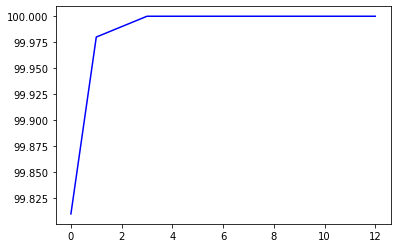

In [19]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="blue")

In [21]:
finaldf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), data[['Type']]], axis = 1)

In [22]:
finaldf

,pc1,pc2,pc3,Type
0,0.189635,0.012794,0.001864,1
1,0.180429,-0.003194,0.004062,1
2,0.260771,-0.003892,-0.000663,1
3,0.436486,0.000115,-0.000546,1
4,-0.006888,0.011007,-0.000330,1
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,3
174,0.001864,0.001390,-0.002566,3
175,0.052658,0.011177,-0.001332,3
176,0.055633,0.011114,-0.001065,3


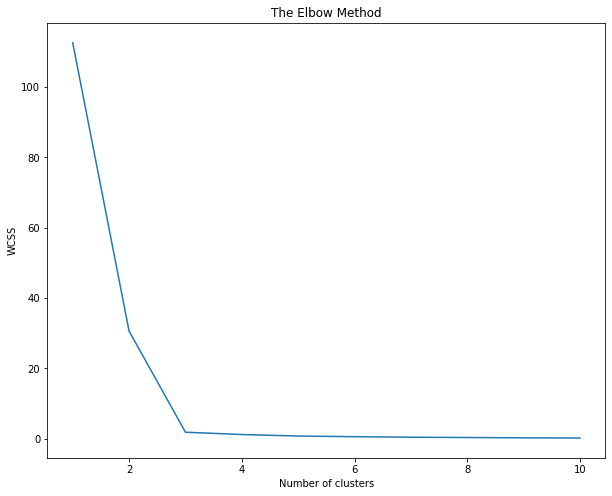

In [23]:
#Performing K-Means Clustering
#Using with Elbow method to find the optimum no of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(finaldf).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(finaldf,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7046376244196593
Silhouette score for k(clusters) = 3 is 0.8906887433929628
Silhouette score for k(clusters) = 4 is 0.7934893991312632
Silhouette score for k(clusters) = 5 is 0.6822063035193946
Silhouette score for k(clusters) = 6 is 0.6914427573862977
Silhouette score for k(clusters) = 7 is 0.5852242596504938
Silhouette score for k(clusters) = 8 is 0.5991039010559513
Silhouette score for k(clusters) = 9 is 0.6002899535946985
Silhouette score for k(clusters) = 10 is 0.5808685430101843
Silhouette score for k(clusters) = 11 is 0.5854630977632372


In [25]:
model=KMeans(n_clusters=3) 
model.fit(finaldf)
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:7].groupby(df.kclust).mean()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids
kclust,,,,,,
0,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845
1,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458
2,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373


Text(0.5, 0.98, 'Relative comparison of people in respective clusters')

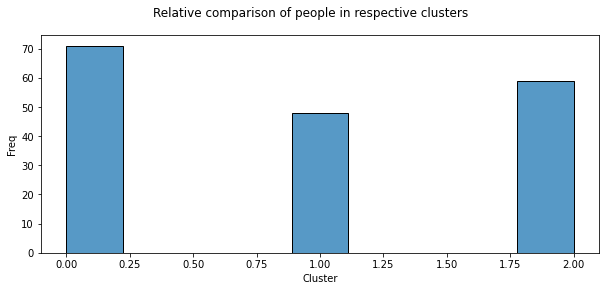

In [27]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.suptitle('Relative comparison of people in respective clusters')

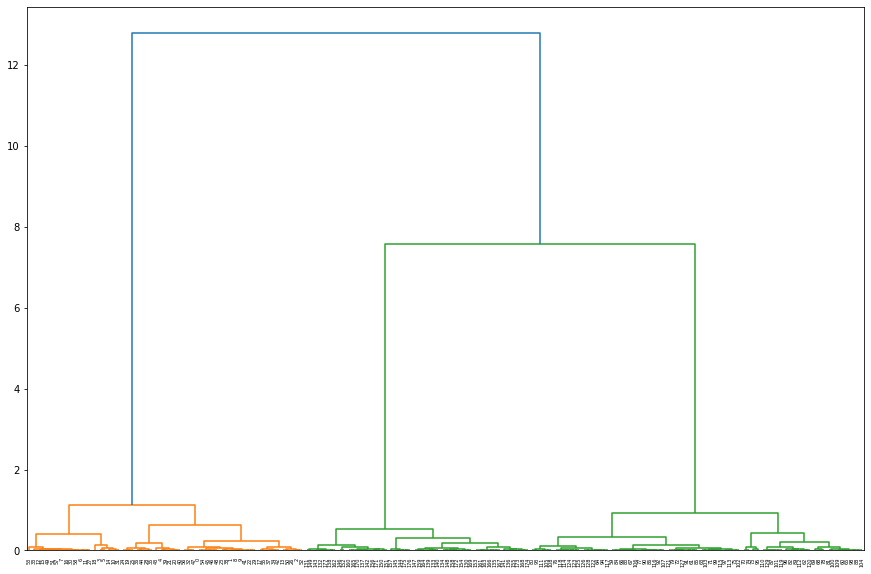

In [28]:
# Hierarchical Clustering, dendrogram

plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(finaldf, method='ward'))

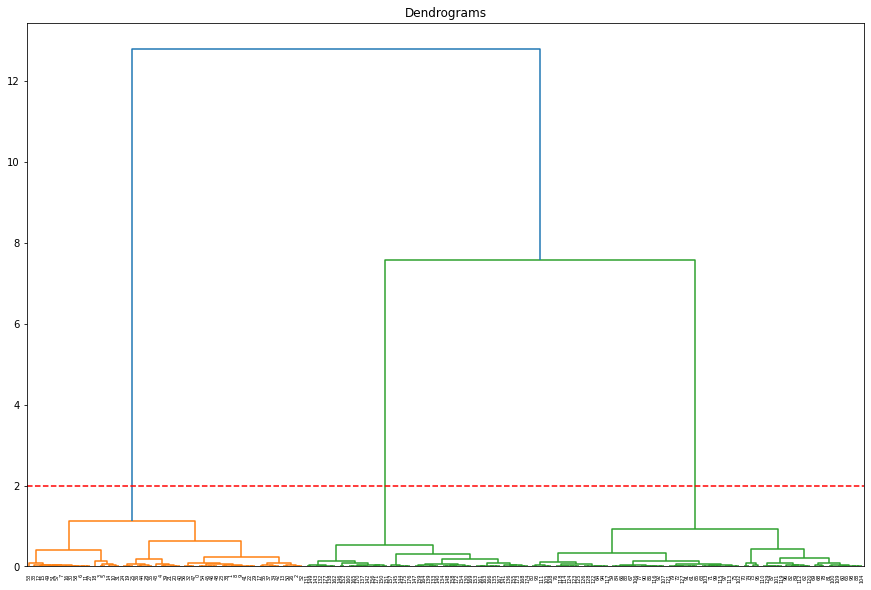

In [29]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(finaldf, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

In [31]:
# Now, testing for optimum no of clusters in the case of original dataset (without PCA)

df_norm1 = norm_func(df)

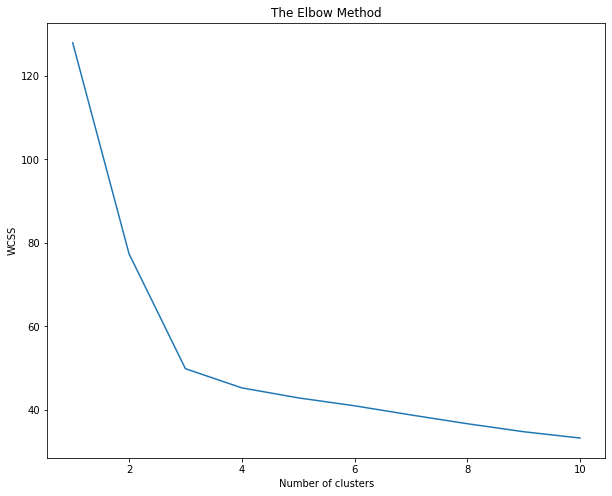

In [32]:
# Performing K-Means Clustering

wcss1 = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 200)
    kmeans1.fit(df_norm1)
    wcss1.append(kmeans1.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_norm1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_norm1,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.37998831526353644
Silhouette score for k(clusters) = 3 is 0.42761090430269183
Silhouette score for k(clusters) = 4 is 0.3389107817266987
Silhouette score for k(clusters) = 5 is 0.2764654711158627
Silhouette score for k(clusters) = 6 is 0.20099954064407316
Silhouette score for k(clusters) = 7 is 0.15358497669669247
Silhouette score for k(clusters) = 8 is 0.2838338741748304
Silhouette score for k(clusters) = 9 is 0.15232973149162898
Silhouette score for k(clusters) = 10 is 0.14723848731726666
Silhouette score for k(clusters) = 11 is 0.14248183052316857
Silhouette score for k(clusters) = 12 is 0.141827480170242


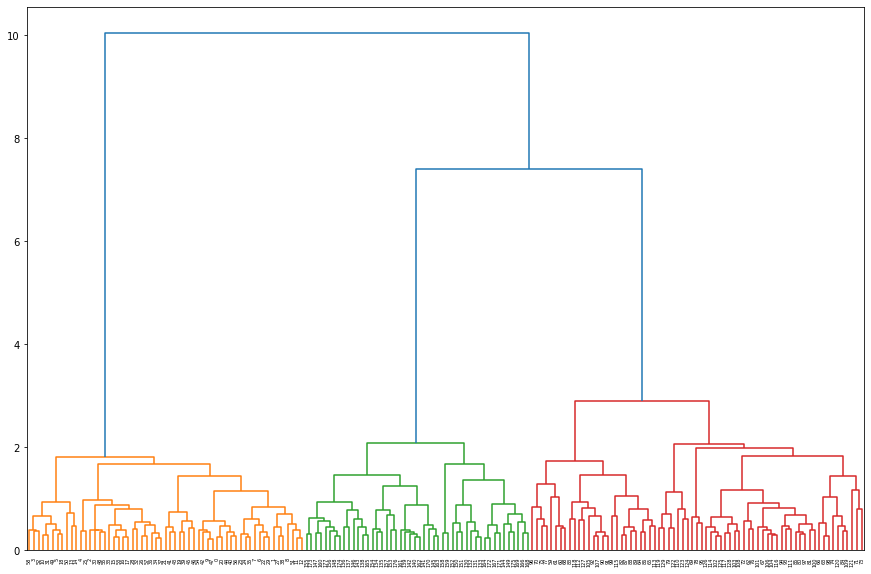

In [35]:
# Performing Hierarchical clustering

plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method='ward'))

In [ ]:
# The number is clusters are 3 at the end